K Nearest Neighbor algorithm

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	#print(row1)
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [ ]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [ ]:
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)

Visualize simulated data

In [ ]:
from numpy import loadtxt
lines = loadtxt("data/D2z.txt", delimiter=" ", unpack=False)

In [ ]:
import numpy as np

In [ ]:
test_range=np.array(list(range(-20,21)))/10

test_matrix=[[0]*41]*41
for x in range(0,41):
  for y in range(0,41):
    test_matrix[x][y]=[test_range[x],test_range[y]]

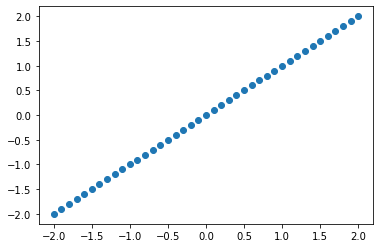

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test_range,test_range)
plt.show()


In [ ]:
xv, yv = np.meshgrid(test_range, test_range, sparse=False, indexing='ij')


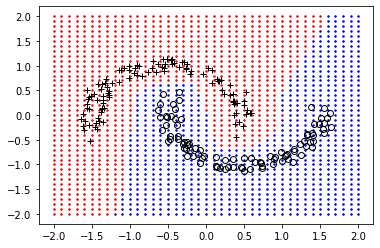

In [ ]:
def f(x, y):
    return y * np.sin(x) 

Z = np.zeros((41,41))
for i in range(41):
   for j in range(41):
      #Z[i,j] = k_nearest_neighbors(lines, [test_range[i],test_range[j]], 1)
      prediction = predict_classification(lines, np.asarray([test_range[i],test_range[j],0]), 1)
      Z[i,j] = prediction
      #print(Z[i,j])
      if Z[i,j] == 0.0:
        color='b'
      else:
        color='r'
      plt.plot(xv[i][j], yv[i][j], color, marker='.', markersize=3, linestyle='none')


for row in range(200):
  if lines[row,2] == 1:
    marker='+'
  else:
    marker='o'
  plt.plot(lines[row,0],lines[row,1],marker, color='k', linestyle='none', fillstyle='none')


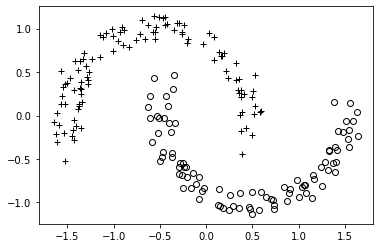

In [ ]:
for row in range(200):
  if lines[row,2] == 1:
    marker='+'
  else:
    marker='o'
  plt.plot(lines[row,0],lines[row,1],marker, color='k', linestyle='none', fillstyle='none')



Logistic regression

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(data[:,0:-1])

scores=list()
n_folds=5
for n in range(n_folds):
    if n == 0:
        train=X_train[(n+1)*1000:,:]
        y=data[(n+1)*1000:,-1]
    elif n == n_folds-1:
        train=X_train[0:n*1000,:]
        y=data[0:n*1000,-1]
    else:
        train=np.concatenate((X_train[0:n*1000,:],X_train[(n+1)*1000:,:]), axis=0)
        y=np.concatenate((data[0:n*1000,-1],data[(n+1)*1000:,-1]), axis=0)
    #print(train)
    #print(y)
    logisticRegr = LogisticRegression()        
    logisticRegr.fit(train, y)
    p=logisticRegr.predict(X_train[n*1000:(n+1)*1000,:])
    #print(p)
    
    accuracy = accuracy_metric(data[n*1000:(n+1)*1000,-1], p)
    scores.append(accuracy)
    #print(accuracy)
    print([accuracy_score(data[n*1000:(n+1)*1000,-1], p),precision_score(data[n*1000:(n+1)*1000,-1], p),recall_score(data[n*1000:(n+1)*1000,-1], p)])

[0.965, 0.9775280898876404, 0.9734265734265735]
[0.965, 0.9751381215469613, 0.9764868603042877]
[0.949, 0.9403973509933775, 0.9916201117318436]
[0.948, 0.9491758241758241, 0.9787535410764873]
[0.947, 0.9546099290780142, 0.9697406340057637]


Classify spam emails

In [ ]:
import pandas as pd
df=pd.read_csv('data/emails.csv', delimiter=' ')
df.to_numpy()
print(df)

      Email  \
0     Email   
1     Email   
2     Email   
3     Email   
4     Email   
...     ...   
4995  Email   
4996  Email   
4997  Email   
4998  Email   
4999  Email   

     No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,e,any,our,corp,can,d,all,has,was,know,need,an,forwarded,new,t,may,up,j,mmbtu,should,do,am,get,out,see,no,there,price,daren,but,been,company,l,these,let,so,would,m,into,xls,farmer,attached,us,information,they,message,day,time,my,one,what,only,http,th,volume,mail,contract,which,month,more,robert,sitara,about,texas,nom,energy,pec,questions,www,deals,volumes,pm,ena,now,their,file,some,email,just,also,call,change,other,here,like,b,flow,net,following,p,production,when,over,back,want,original,them,below,o,ticket,c,he,could,make,inc,report,march,contact,were,days,list,nomination,system,who,april,number,sale,don,its,first,thanks,business,help,per,through,ju

In [ ]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		next(csv_reader)       
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row[1:])
	return dataset

Mean Accuracy: 85.800%
Mean Accuracy: 85.300%
Mean Accuracy: 83.900%
Mean Accuracy: 82.340%
Mean Accuracy: 78.640%


Text(0.5, 1.0, 'kNN 5-Fold Cross Validation')

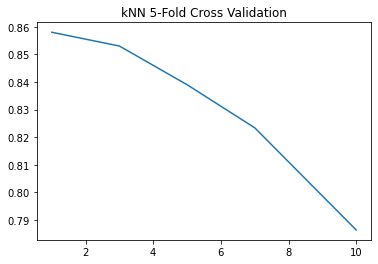

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(data[:,0:-1])

k_set=[1,3,5,7,10]
a=list()
for k in k_set:
    n_folds=5
    mean_accu=0
    for n in range(n_folds):
        if n == 0:
            train=X_train[(n+1)*1000:,:]
            y=data[(n+1)*1000:,-1]
        elif n == n_folds-1:
            train=X_train[0:n*1000,:]
            y=data[0:n*1000,-1]
        else:
            train=np.concatenate((X_train[0:n*1000,:],X_train[(n+1)*1000:,:]), axis=0)
            y=np.concatenate((data[0:n*1000,-1],data[(n+1)*1000:,-1]), axis=0)

        knn_model = KNeighborsClassifier(n_neighbors=k)  
        #print(train)
        #print(y)
        knn_model.fit(train, y)
        p=knn_model.predict(X_train[n*1000:(n+1)*1000,:])
        accuracy = accuracy_metric(data[n*1000:(n+1)*1000,-1], p)
        scores.append(accuracy)
        mean_accu+=accuracy[0]
        #print(p)
    a.append(mean_accu/100/float(n_folds))
    print('Mean Accuracy: %.3f%%' % (mean_accu/float(n_folds)))


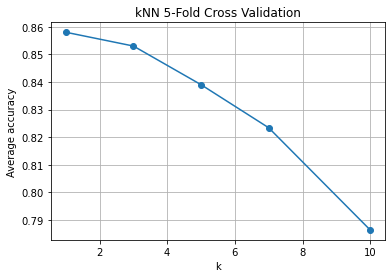

In [ ]:
plt.plot(k_set, a, marker='.', markersize=12)
plt.title('kNN 5-Fold Cross Validation')
plt.grid()
plt.ylabel('Average accuracy')
plt.xlabel('k')
plt.show()

ROC curves of KNN and logistic regression

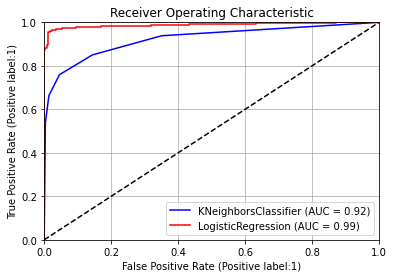

In [ ]:
for n in range(1):    
    if n == 0:
        train=X_train[(n+1)*1000:,:]
        y=data[(n+1)*1000:,-1]
    elif n == n_folds:
        train=X_train[0:n*1000,:]
        y=data[0:n*1000,-1]
    else:
        train=np.concatenate((X_train[0:n*1000,:],X_train[(n+1)*1000:,:]), axis=0)
        y=np.concatenate((data[0:n*1000,-1],data[(n+1)*1000:,-1]), axis=0)
    
    logisticRegr = LogisticRegression()        
    logisticRegr.fit(train, y)
    p=logisticRegr.predict(X_train[n*1000:(n+1)*1000,:])
    
    knn_model = KNeighborsClassifier(n_neighbors=5)      
    knn_model.fit(train, y)
    p2=knn_model.predict(X_train[n*1000:(n+1)*1000,:])
    
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
X_test=X_train[0:1000,:]
y_test=data[0:1000,-1]
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# calculate the fpr and tpr for all thresholds of the classification
probsK = knn_model.predict_proba(X_test)
predsK = probsK[:,1]
fprK, tprK, thresholdK = metrics.roc_curve(y_test, predsK)
roc_aucK = metrics.auc(fprK, tprK)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')

plt.plot(fprK, tprK, 'b', label = 'KNeighborsClassifier (AUC = %0.2f)' % roc_aucK)
plt.legend(loc = 'lower right')

plt.plot(fpr, tpr, 'r', label = 'LogisticRegression (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')

plt.grid()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Positive label:1)')
plt.xlabel('False Positive Rate (Positive label:1)')
plt.show()